## Load the data

In [243]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [188]:
import sys
sys.path.append('src/features')

from customplots import *
from reweight_proba import *

In [2]:
train = pd.read_csv('data/processed/train.csv')
train.set_index('icustay_id', inplace=True)

print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20885 entries, 228357 to 258400
Columns: 811 entries, HeartRate_Min to ICD9_0_L1_1_2_3
dtypes: float64(811)
memory usage: 129.4 MB
None


,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,ICD9_CODE_O_10_L1_ICD9_CODE_O_6_L1,ICD9_CODE_O_10_L1_ICD9_CODE_O_7_L1,ICD9_CODE_O_10_L1_ICD9_CODE_O_8_L1,ICD9_CODE_O_10_L1_ICD9_CODE_O_9_L1,GENDER_ICD9DIAG,AGE_ICD9DIAG,GENDER_AGE_ICD9DIAG,ICD9_diagnosis_1_2,ICD9_0_L1_1_2,ICD9_0_L1_1_2_3
icustay_id,,,,,,,,,,,,,,,,,,,,,
228357,1.33218,1.948876,2.403148,-1.006425,-1.021078,-0.772756,-0.202861,0.088173,-0.127848,0.189415,...,1.509058,-0.398645,0.929949,0.367890,-0.720769,0.232231,0.355083,-0.187505,-0.222547,0.394449
221004,-0.46234,0.234689,-0.405068,-0.127652,-1.279621,-0.763765,0.399285,-0.764372,0.202969,0.117851,...,-0.866732,-0.909108,-0.905278,-0.872673,-0.225775,-0.270395,-0.528072,-0.246277,-0.177883,-0.847985
296315,0.78002,-0.353032,0.437012,-0.186237,-0.547081,-0.392030,0.055202,-1.137360,-0.532373,0.547234,...,1.856850,0.058470,-0.864646,-0.206783,-0.077142,-0.255789,0.369981,-0.101701,-0.191736,0.177013
245557,0.43492,1.116271,0.917094,-0.420577,-0.676353,-0.749047,-1.235111,0.034889,-1.922454,-0.597786,...,-0.520172,-0.677242,-0.700432,-0.290224,-0.352110,-0.306233,-0.432051,-0.472576,-0.253667,0.405987
292786,0.71100,0.430596,0.744087,-1.182180,-0.503991,-1.047845,-1.235111,-1.563633,-1.922454,-0.884041,...,-0.506747,-0.664903,-0.679860,-0.322564,-0.666738,-0.381377,0.218631,-0.403414,-0.956360,-0.462257


In [3]:
test = pd.read_csv('data/processed/test.csv')
test.set_index('icustay_id', inplace=True)
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5221 entries, 286120 to 286384
Columns: 810 entries, HeartRate_Min to ICD9_0_L1_1_2_3
dtypes: float64(810)
memory usage: 32.3 MB
None


,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,ICD9_CODE_O_10_L1_ICD9_CODE_O_6_L1,ICD9_CODE_O_10_L1_ICD9_CODE_O_7_L1,ICD9_CODE_O_10_L1_ICD9_CODE_O_8_L1,ICD9_CODE_O_10_L1_ICD9_CODE_O_9_L1,GENDER_ICD9DIAG,AGE_ICD9DIAG,GENDER_AGE_ICD9DIAG,ICD9_diagnosis_1_2,ICD9_0_L1_1_2,ICD9_0_L1_1_2_3
icustay_id,,,,,,,,,,,,,,,,,,,,,
286120,0.02080,-0.010194,0.022425,0.399611,-0.762534,-0.099920,0.227244,-0.657804,-0.368620,0.332543,...,-0.665465,-1.859467,-1.366493,-1.256403,-0.429993,-0.337667,-1.282706,-0.481984,-0.430885,-1.534544
248206,0.60747,0.234689,0.550471,0.546073,1.413541,1.248266,0.184233,0.221383,0.806786,0.296761,...,1.106359,-0.067872,-0.497785,0.202090,-0.668973,-0.395110,0.458094,-0.651950,0.869419,0.838465
293175,-0.80744,0.724457,0.140758,0.048102,2.383079,0.063354,-0.374902,0.461162,-0.846234,0.046288,...,-0.410181,-0.724168,-0.541266,0.452246,0.062963,1.314272,0.256677,-0.049629,-0.381478,-0.079716
240974,0.02080,-1.528474,-0.983438,0.399611,-0.934897,-0.663219,-0.202861,-1.989905,-1.489938,0.117851,...,0.157968,0.013478,-1.776884,-0.095481,1.539817,1.186751,3.854509,-0.240216,1.058680,0.546156
202015,0.26237,-0.867288,-0.563214,-0.391284,-1.365803,-1.280389,-0.159850,-0.471309,-0.765732,-0.132622,...,0.516158,0.984634,0.792480,-0.798425,-0.209156,0.700259,-1.080735,-0.251975,-1.114369,0.683819


In [5]:
target = 'HOSPITAL_EXPIRE_FLAG'
y = train[target]
X_train = train.drop(target, axis=1)
X_test = test
print(X_train.shape)
print(X_test.shape)

(20885, 810)
(5221, 810)


In [7]:
feature_names = X_test.columns

## Base line Knn model

First, I fit a KNN model with the default parameters and the data that I prepared in the Notebook: "Data preparation". Since the kaggle competition is based in the Area Under the Curve (AUC) of the Receiving Operating Characteristic line (ROC) I am focused on this metric. The average AUC from this first model is the started point from wich I expect to improve by hyperparamenter tunning and dealing the class imbalance.

In [183]:
# Initial libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score, f1_score

In [20]:
# Fist model with default parameters 
model_knn_bl = KNeighborsClassifier()
splitter = KFold(n_splits=5, random_state=None, shuffle=True)

metrics = []
# Split train data into train and validation to predict over unobserved data
for train_index, val_index in splitter.split(train):
    train_df, val_df = train.iloc[train_index], train.iloc[val_index] 
    
    model_knn_bl.fit(train_df[feature_names], train_df[target])
    predictions = model_knn_bl.predict_proba(val_df[feature_names])
    metrics.append(roc_auc_score(val_df[target], predictions[:,1]))

In [ ]:
Above, I use 

In [21]:
print(metrics)
print(metrics.mean())

[0.7905952757437905, 0.7890621875402725, 0.7829315175784052, 0.782552365304212, 0.8001028846756856]


In [22]:
model_knn_bl.fit(train[feature_names], train[target])
y_train_hat_knn_bl = model_knn_bl.predict_proba(train[feature_names])

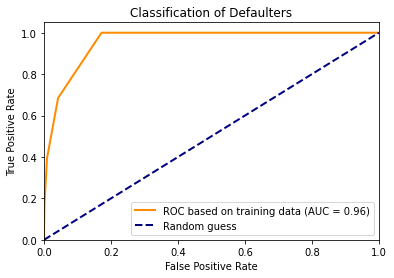

In [23]:
roc_curve_plot(train[target], y_train_hat_knn_bl[:,1])

The model is doing it so bad with un observed data (overfitting), which is not want I want. But lets add this estimation to kaggle.

In [25]:
y_test_hat_knn_bl = model_knn_bl.predict_proba(test[feature_names])

test_predictions_submit = pd.DataFrame({"icustay_id": test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_bl[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_bl.csv", index = False)

## A better approach -  Class imbalance and hyperparameter tunning

In [190]:
import imblearn

from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection, NeighbourhoodCleaningRule, TomekLinks

### Class imbalance

Which one is the best approach to class imbalance ?

In [228]:
under_sampling = [RandomUnderSampler(random_state=123),
                  NearMiss(),
                  OneSidedSelection(random_state=123), 
                  NeighbourhoodCleaningRule(),
                  TomekLinks()]

reweight = [ReweightProba(reweight=False), ReweightProba(reweight=True)]

In [244]:
def class_imbalance_pipeline(model, classb_method, reweight_method):

    splitter = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

    fits_data = {}
    fits_data['method'] = []; fits_data['reweighted'] = []; fits_data['nrows'] = []; fits_data['auc'] = []; fits_data['f1'] = []

    for train_index, val_index in splitter.split(X_train, y):
        train_df, val_df = X_train.iloc[train_index], X_train.iloc[val_index] 
        train_y, val_y = y.iloc[train_index], y.iloc[val_index] 

        for method in classb_method:
            for j, adjust in enumerate(reweight_method):
                X_resampled, y_resampled = method.fit_resample(train_df, train_y)

                model.fit(X_resampled, y_resampled)
                predictions = model.predict_proba(val_df)

                reweighted_transformer = adjust
                reweighted_transformer.fit(predictions[:,1], y.mean() ,0.5)
                predictions_a = reweighted_transformer.transform(predictions[:,1])

                fits_data['method'].append(str(method)[:10])
                fits_data['reweighted'].append(j)
                fits_data['nrows'].append(X_resampled.shape[0])
                fits_data['auc'].append(roc_auc_score(val_y, predictions_a))
                fits_data['f1'].append(f1_score(val_y, (predictions_a > 0.5).astype(int)))

    return pd.DataFrame(fits_data)

model_knn_bl = KNeighborsClassifier()

df_fits_under = class_imbalance_pipeline(model_knn_bl, under_sampling, reweight)
df_fits_under.groupby(['method', 'reweighted'])['auc', 'f1'].mean()

auc        f1
method     reweighted                    
NearMiss() 0           0.809772  0.446022
           1           0.809772  0.289587
Neighbourh 0           0.833107  0.494112
           1           0.833107  0.259410
OneSidedSe 0           0.789187  0.364320
           1           0.789187  0.088269
RandomUnde 0           0.844075  0.448690
           1           0.844075  0.365706
TomekLinks 0           0.789260  0.364320
           1           0.789260  0.088269

The table above shows that the reweight of probabilities do not affect the auc (for that reason I included the F1) and the F1 score is better if I do not reweighted the probabilities.

Besides, according with the above table, the best strategy for dealing with class imbalance by the under-sampling approach is the Random undersampling. However this algorith's drawback is that is trained with same amount of rows whose target value is 1. This means that uses only around 12% of the training data.

Another good algorithm to use is the Neighborhood Cleaning Rule NCR (NeighbourhoodCleaningRule()), this method belongs to the family of Cleaning under-sampling techniques, which consist in clear the noisy observations of the dataset (cleaning the data) instead of create a balanced data. The method of NCR is show in the next table, it performs a process in which noisy rows are droped. 

The full explanation of NCR is available in https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2001-Laurikkala-LNCS.pdf

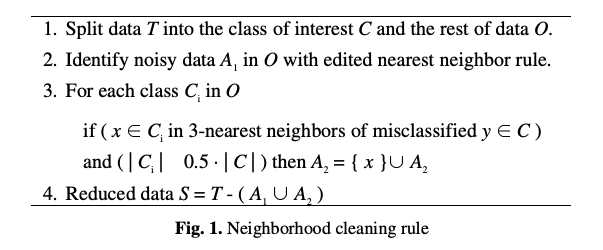

Lets see now how well a couple of algorithm for over sampling from imblearn work in constrast with the undersampling methods

In [237]:
# Classes for over samplig from imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, ADASYN, BorderlineSMOTE

In [245]:
# Algorithm to use with default paramenters (only choose the radom_state)
over_sampling = [RandomOverSampler(random_state=123),
                 SMOTE(random_state=123),
                 ADASYN(random_state=123), 
                 BorderlineSMOTE(random_state=123)]

In [246]:
df_fits_over = class_imbalance_pipeline(model_knn_bl, over_sampling, reweight)
df_fits_over.groupby(['method', 'reweighted'])['auc', 'f1'].mean()

auc        f1
method     reweighted                    
ADASYN(ran 0           0.763994  0.271630
           1           0.763994  0.362083
Borderline 0           0.787103  0.292251
           1           0.787103  0.392064
RandomOver 0           0.783184  0.449111
           1           0.783184  0.433596
SMOTE(rand 0           0.772339  0.277340
           1           0.772339  0.372561

The table above shows that in this case, the reweight improves F1 score in all of the methods (shoud I use a different function to reweight if I do undersampling?). However the performance in both the AUC and the F1 is lower in all the methods of oversampling in constrast with undersampling.

According with the above, I will use the NCR method for under sampling. However I want to do a smalll grid search over the parameters of the NCR method to work with the best approach to balanced data possible.

#### Grid search over the choosen method for dealing with imbalanced classes

The next loop does grid search over a list of NeighbourhoodCleaningRule() classes with different values for number of nerigbors and the method to select the row to eliminate from the data.

In [298]:
# List (with) names of the methods of NCR to fit over
NCR_gs = [('default', NeighbourhoodCleaningRule()),
                 ('k=1, sel=all', NeighbourhoodCleaningRule(n_neighbors = 1, kind_sel = "all")),
                 ('k=5, sel=all', NeighbourhoodCleaningRule(n_neighbors = 5, kind_sel = "all")),
                 ('k=10, sel=all', NeighbourhoodCleaningRule(n_neighbors = 10, kind_sel = "all")),
                 ('k=15, sel=all', NeighbourhoodCleaningRule(n_neighbors = 20, kind_sel = "all")),
                 ('k=20, sel=all', NeighbourhoodCleaningRule(n_neighbors = 20, kind_sel = "all")),
                 ('k=1, sel=mode', NeighbourhoodCleaningRule(n_neighbors = 1, kind_sel = "mode")),
                 ('k=5, sel=mode', NeighbourhoodCleaningRule(n_neighbors = 5, kind_sel = "mode")),
                 ('k=10, sel=mode', NeighbourhoodCleaningRule(n_neighbors = 10, kind_sel = "mode")),
                 ('k=15, sel=mode', NeighbourhoodCleaningRule(n_neighbors = 10, kind_sel = "mode")),
                 ('k=20, sel=mode', NeighbourhoodCleaningRule(n_neighbors = 20, kind_sel = "mode"))]

# The splitter is a stratifield k fold since we have imbalanced data
splitter = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

# Dictionary to save results 
data = {}; data['Params'] = []; data['AUC'] = []

# Loop that splits the data into training and validation 5 times, for each method. It is a grid search made by hand.
for train_index, val_index in splitter.split(X_train, y):
        train_df, val_df = X_train.iloc[train_index], X_train.iloc[val_index] 
        train_y, val_y = y.iloc[train_index], y.iloc[val_index] 

        for name, method in NCR_gs:
            X_resampled, y_resampled = method.fit_resample(train_df, train_y)

            model_knn_bl.fit(X_resampled, y_resampled)
            predictions = model_knn_bl.predict_proba(val_df)
            
            data['Params'].append(name)
            data['AUC'].append(roc_auc_score(val_y, predictions[:,1]))
            
# Data and data.frame
df_fits_NCR = pd.DataFrame(data)
df_fits_NCR.groupby(['Params'])['AUC'].mean()

Params
default           0.833107
k=1, sel=all      0.811232
k=1, sel=mode     0.811232
k=10, sel=all     0.851447
k=10, sel=mode    0.850478
k=15, sel=all     0.849540
k=15, sel=mode    0.850478
k=20, sel=all     0.849540
k=20, sel=mode    0.849533
k=5, sel=all      0.841145
k=5, sel=mode     0.840507
Name: AUC, dtype: float64

So I will use the selection parameter with value all for 10 neighboors

In [264]:
model_knn_bl_r = KNeighborsClassifier()
resampling_m1 = NeighbourhoodCleaningRule(n_neighbors = 10, kind_sel = "all")

print(X_train.shape, y.shape)
X_resampled, y_resampled = resampling_m1.fit_resample(X_train, y)
print(X_resampled.shape, y_resampled.shape)

(20885, 810) (20885,)
(17902, 810) (17902,)


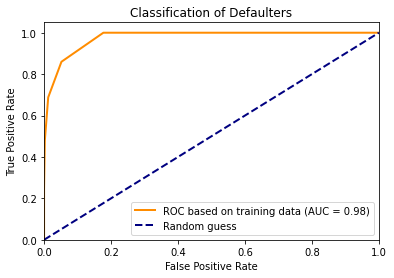

In [267]:
model_knn_bl_r.fit(X_resampled, y_resampled)
y_train_hat_knn_bl_r = model_knn_bl_r.predict_proba(X_resampled)

roc_curve_plot(y_resampled, y_train_hat_knn_bl_r[:,1])

In [268]:
y_test_hat_knn_bl_r = model_knn_bl_r.predict_proba(X_test)

test_predictions_submit = pd.DataFrame({"icustay_id": X_test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_bl_r[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_bl_r.csv", index = False)

The new predictions are better. However the model overfits which is normal because I haven't started the hyperparameter tunning

### Hyper parameter tunning

In [ ]:
parameters1 = {'n_neighbors' : [50, 100, 300, 600], 
               'weights' : ['uniform', 'distance'],
               'p': [1,2]}

results = {'n_neighbors' : [], 
           'weights' : [],
           'p': [],
           'AUC' : []}

from datetime import datetime
start_time = datetime.now()

resampling_m1 = NeighbourhoodCleaningRule(n_neighbors = 10, kind_sel = "all")
splitter = StratifiedKFold(n_splits=4, random_state=123, shuffle=True, )

metrics = []
for train_index, val_index in splitter.split(X_train, y):
    train_df, val_df = X_train.iloc[train_index], X_train.iloc[val_index] 
    train_y, val_y = y.iloc[train_index], y.iloc[val_index] 

    X_resampled, y_resampled = resampling_m1.fit_resample(train_df, train_y)
    
    for k in parameters1['n_neighbors']:
        for weight in parameters1['weights']:
            for p in parameters1['p']:
                model = KNeighborsClassifier(n_neighbors = k,
                                             weights = weight,
                                             algorithm = 'kd_tree', # The faster: the three algorithms give the same AUC
                                             p = p)
                model.fit(X_resampled, y_resampled)
                predictions = model.predict_proba(val_df)

                results['n_neighbors'].append(k)
                results['weights'].append(weight)
                results['p'].append(p)
                auc = roc_auc_score(val_y, predictions[:,1])
                results['AUC'].append(auc)
                print('k:', k, weight, 'p:', p, ' : ', auc)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

k: 50 uniform p: 1  :  0.8565403961047433
k: 50 uniform p: 2  :  0.8684683790652927
k: 50 distance p: 1  :  0.8656728212309497
k: 50 distance p: 2  :  0.8721817002328406
k: 100 uniform p: 1  :  0.8556373346270966
k: 100 uniform p: 2  :  0.8671391475496601
k: 100 distance p: 1  :  0.862376113895275
k: 100 distance p: 2  :  0.8696285392420091
k: 300 uniform p: 1  :  0.8536196887249631
k: 300 uniform p: 2  :  0.8635695370201912
k: 300 distance p: 1  :  0.8574985895407324
k: 300 distance p: 2  :  0.8647443990524654
k: 600 uniform p: 1  :  0.852337135600727
k: 600 uniform p: 2  :  0.8606502998259667
k: 600 distance p: 1  :  0.8550257374358861
k: 600 distance p: 2  :  0.8615452752830567
k: 50 uniform p: 1  :  0.8689417954353836
k: 50 uniform p: 2  :  0.8785279314902563
k: 50 distance p: 1  :  0.8773735231636421
k: 50 distance p: 2  :  0.8819834248244732
k: 100 uniform p: 1  :  0.8694051419125145
k: 100 uniform p: 2  :  0.8771056768687573
k: 100 distance p: 1  :  0.875818726045705
k: 100 dist

In [282]:
results_gs_knn1 = pd.DataFrame(results)
results_gs_knn1.groupby(['n_neighbors', 'weights', 'p'])['AUC'].mean().sort_values(ascending=False)

n_neighbors  weights   p
50           distance  2    0.880275
100          distance  2    0.877624
50           uniform   2    0.875165
100          uniform   2    0.873995
50           distance  1    0.873706
100          distance  1    0.871620
300          distance  2    0.871191
             uniform   2    0.869246
600          distance  2    0.867248
             uniform   2    0.865889
300          distance  1    0.865049
50           uniform   1    0.863252
100          uniform   1    0.863132
600          distance  1    0.861017
300          uniform   1    0.859899
600          uniform   1    0.857325
Name: AUC, dtype: float64

From the values of the grid search the best parameter are 50 neighboor, with 


Lets see the performance of this model in the whole training data (resampled)

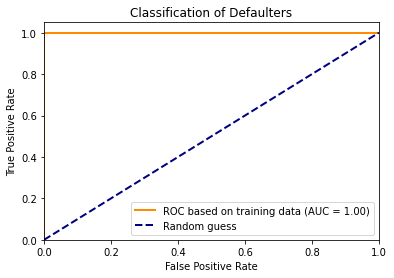

In [283]:
# Initialization of model and resampling method
model_knn_m1 = KNeighborsClassifier(weights = 'distance', p = 2, n_neighbors = 50, algorithm = 'kd_tree')
resampling_m1 = NeighbourhoodCleaningRule()

# Getting the resample data
X_resampled, y_resampled = resampling_m1.fit_resample(X_train, y)

# FIt the model in the resampled data and get the predicted proba on this data
model_knn_m1.fit(X_resampled, y_resampled)
y_train_hat_knn_m1 = model_knn_m1.predict_proba(X_resampled)

roc_curve_plot(y_resampled, y_train_hat_knn_m1[:,1])

0.00919364106493009


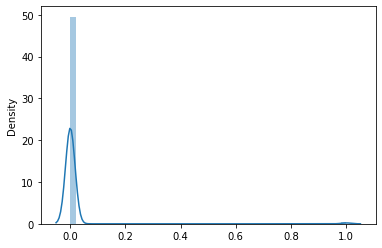

In [290]:
sns.distplot((predictions[:,1] > 0.5).astype(int))
print((predictions[:,1] > 0.5).astype(int).mean())

<AxesSubplot:ylabel='Density'>

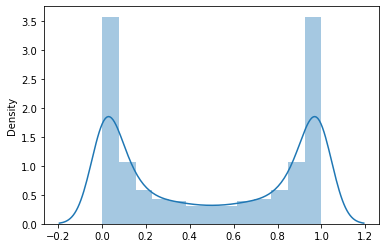

In [289]:
sns.distplot(y_test_hat_knn_m1)

In [286]:
y_test_hat_knn_m1 = model_knn_m1.predict_proba(X_test)

In [ ]:
Prediction over test data

In [291]:
#y_test_hat_knn_m1 = model_knn_m1.predict_proba(X_test)

test_predictions_submit = pd.DataFrame({"icustay_id": test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_m1[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_m1.csv", index = False)

### Gridsearch

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
parameters1 = {'n_neighbors' : [1, 5, 10, 20, 40, 60, 80, 100, 200, 300, 400, 500, 700, 1000], 
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'p': [1,2]}

knn_gs1 = RandomizedSearchCV(KNeighborsClassifier(), 
                             parameters1, 
                             random_state = 0, 
                             scoring = 'roc_auc',
                             cv = 5,
                             verbose = 3,
                             n_iter = 20,
                             n_jobs = 5)

In [34]:
knn_gs1.fit(train[feature_names], train[target])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=5,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [1, 5, 10, 20, 40, 60,
                                                        80, 100, 200, 300, 400,
                                                        500, 700, 1000],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='roc_auc', verbose=3)

In [35]:
print(knn_gs1.best_params_)

{'weights': 'uniform', 'p': 2, 'n_neighbors': 100, 'algorithm': 'kd_tree'}


In [9]:
model_knn_m1 = KNeighborsClassifier(weights = 'uniform', p = 2, n_neighbors = 100, algorithm = 'kd_tree')
splitter = KFold(n_splits=5, random_state=None, shuffle=True)

metrics = []
for train_index, val_index in splitter.split(train):
    train_df, val_df = train.iloc[train_index], train.iloc[val_index] 
    
    model_knn_m1.fit(train_df[feature_names], train_df[target])
    predictions = model_knn_m1.predict_proba(val_df[feature_names])
    metrics.append(roc_auc_score(val_df[target], predictions[:,1]))
    
print(metrics)

[0.8669746748802192, 0.8916933533642587, 0.8797885154906812, 0.8794109906305927, 0.8708652457239942]


In [10]:
model_knn_m1.fit(train[feature_names], train[target])
y_train_hat_knn_m1 = model_knn_m1.predict_proba(train[feature_names])

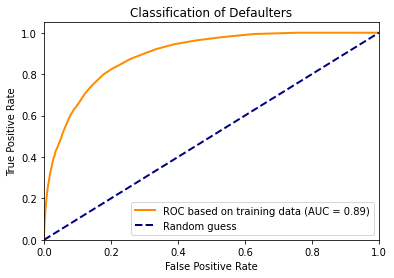

In [11]:
roc_curve_plot(train[target], y_train_hat_knn_m1[:,1])

In [12]:
y_test_hat_knn_m1 = model_knn_m1.predict_proba(test[feature_names])

test_predictions_submit = pd.DataFrame({"icustay_id": test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_m1[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_m1.csv", index = False)

### PIPELINE for grid search and reduce the class imbalance

In [12]:
parameters2 = {'n_neighbors' : [90, 95, 100, 105, 110, 115, 120], 
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'p': [1,2]}

knn_gs2 = RandomizedSearchCV(KNeighborsClassifier(), 
                             parameters2, 
                             random_state = 0, 
                             scoring = 'roc_auc',
                             cv = 5,
                             verbose = 3,
                             n_iter = 20,
                             n_jobs = 5)

In [13]:
knn_gs2.fit(train[feature_names], train[target])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=5,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [90, 95, 100, 105, 110,
                                                        115, 120],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='roc_auc', verbose=3)

In [14]:
print(knn_gs2.best_params_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 105, 'algorithm': 'kd_tree'}


In [12]:
model_knn_m2 = KNeighborsClassifier(weights = 'distance', p = 2, n_neighbors = 105, algorithm = 'kd_tree')
splitter = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

metrics = []
for train_index, val_index in splitter.split(train, train[target]):
    train_df, val_df = train.iloc[train_index], train.iloc[val_index] 
    
    model_knn_m2.fit(train_df[feature_names], train_df[target])
    predictions = model_knn_m2.predict_proba(val_df[feature_names])
    metrics.append(roc_auc_score(val_df[target], predictions[:,1]))
    
print(metrics)

[0.8804086939320963, 0.8702658114880982, 0.8946658869315006, 0.8831990072752282, 0.8841250865414029]


In [ ]:
model_knn_m2.fit(train[feature_names], train[target])
y_train_hat_knn_m2 = model_knn_m2.predict_proba(train[feature_names])

In [ ]:
roc_curve_plot(train[target], y_train_hat_knn_m1[:,1])

In [ ]:
y_test_hat_knn_m2 = model_knn_m2.predict_proba(test[feature_names])

test_predictions_submit = pd.DataFrame({"icustay_id": test.index, "HOSPITAL_EXPIRE_FLAG": y_test_hat_knn_m2[:,1]})
test_predictions_submit.to_csv("data/outputs/knn_m2.csv", index = False)